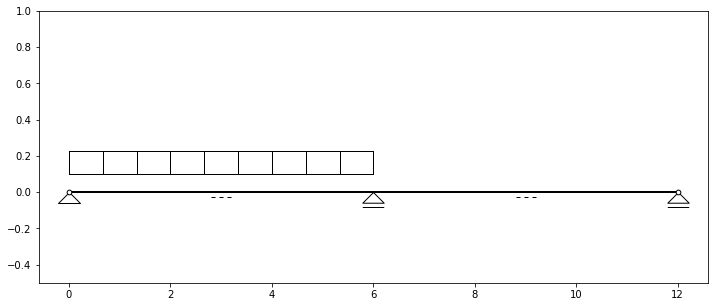

In [1]:
    import numpy as np
    import matplotlib.pyplot as plt
    import stanpy as stp

    EI = 32000  # kN/m2
    l = 6  # m

    hinged_support = {"w": 0, "M": 0}
    roller_support = {"w": 0, "M": 0, "H": 0}
    fixed_support = {"w": 0, "phi": 0}

    s1 = {"EI": EI, "l": l, "bc_i": hinged_support, "bc_k": {"w": 0}, "q": 10}
    s2 = {"EI": EI, "l": l, "bc_k": roller_support}

    s = [s1, s2]

    fig, ax = plt.subplots(figsize=(12, 5))
    stp.plot_system(ax, *s)
    stp.plot_load(ax, *s)
    ax.set_ylim(-0.5,1)
    plt.show()

In [2]:
dx = 1e-9
x_annotate = np.array([l - dx, l, 2 * l])
x = np.sort(np.append(np.linspace(0, 2 * l, 1000), x_annotate))
Zi, Zk = stp.tr_solver(*s)
Fxx = stp.tr(*s, x=x)
Z_x = Fxx.dot(Zi).round(10)

w_x = Z_x[:, 0]
phi_x = Z_x[:, 1]
M_x = Z_x[:, 2]
V_x = Z_x[:, 3]

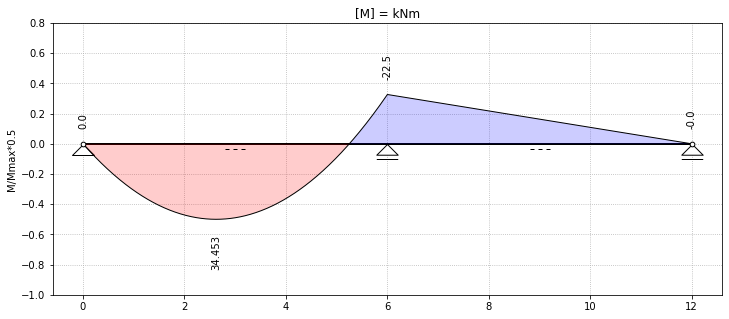

In [4]:


scale = 0.5

fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, *s)
stp.plot_solution(
    ax,
    x=x,
    y=M_x,
    annotate_x=[0, x[M_x == np.max(M_x)], l, 2 * l],
    fill_p="red",
    fill_n="blue",
    scale=scale,
    alpha=0.2,
    flip_y=True
)

ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-1.0, 0.8)
ax.set_ylabel("M/Mmax*{}".format(scale))
ax.set_title("[M] = kNm")
plt.show()

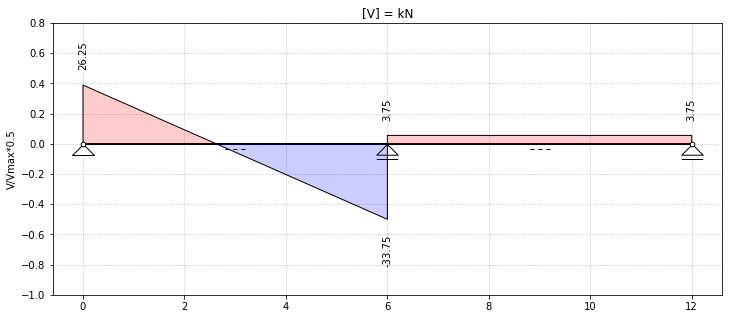

In [5]:
fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, *s)
stp.plot_solution(
    ax,
    x=x,
    y=V_x,
    annotate_x=[0, l,l-dx, 2 * l],
    fill_p="red",
    fill_n="blue",
    scale=scale,
    alpha=0.2,
)

ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-1.0, 0.8)
ax.set_ylabel("V/Vmax*{}".format(scale))
ax.set_title("[V] = kN")
plt.show()


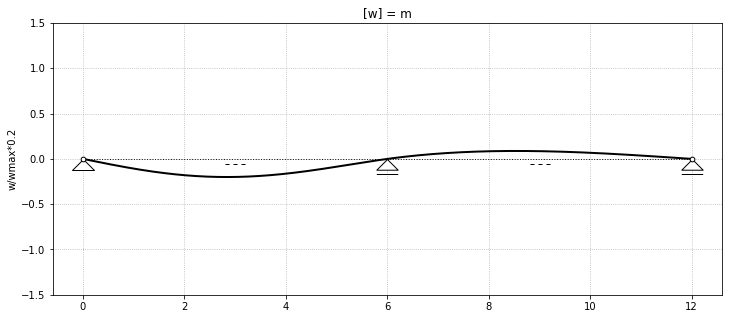

In [11]:
scale = 0.2
fig, ax = plt.subplots(figsize=(12, 5))
stp.plot_system(ax, *s, lw=1, linestyle=":", c="#111111")
stp.plot_solution(ax, x=x, y=w_x, scale=scale, linestyle="-", flip_y=True, lw=2)
ax.grid(linestyle=":")
ax.set_axisbelow(True)
ax.set_ylim(-1.5, 1.5)
ax.set_ylabel("w/wmax*{}".format(scale))
ax.set_title("[w] = m")
plt.show()